# HEXAGONAL MAP

In this script, I am trying to create hexagonal map using Inside Airbnb data. The goal is to map the density of airbnbs in each hexagonal grid so that I can see the the distribution of this airbnb spatially.

### 1. Install Packages

In [229]:
!pip install geopandas #working with spatial dataframe
!pip install h3pandas #converting spatial dataframe to hexagonal dataframe
!pip install pandas #working with dataframe
!pip install matplotlib #plotting the map

### 2. Import Packages

In [235]:
import geopandas as gpd
import h3pandas
import pandas as pd
import matplotlib.pyplot as plt

### 3. Check Package's Version

In [236]:
print(f"geopandas : {gpd.__version__}")
print(f"h3pandas : {h3pandas.__version__}")
print(f"pandas : {pd.__version__}")

geopandas : 0.14.1
h3pandas : 0.2.6
pandas : 2.1.0


### 4. Import Data

In [237]:
#general path for the data
spath = "https://www.dropbox.com/scl/fi/"

#import airbnb data
listings = pd.read_csv(spath+"v6l5tgtocd1nkcw82ed8m/listings.csv.gz?rlkey=ef2fq1t9jg5hakm0eu4kvoad4&dl=1", compression="gzip", low_memory=False)

#import london neighborhood data
neighborhoods = gpd.read_file(spath+"qmuuncr9luoguae5wa6ho/neighbourhoods.geojson?rlkey=rflewdp5df2am8ydpstessz20&dl=1", crs="EPSG:27700")

### 5. Transform Airbnb data to Have Geometry Attribute (and Plot It as a Map)

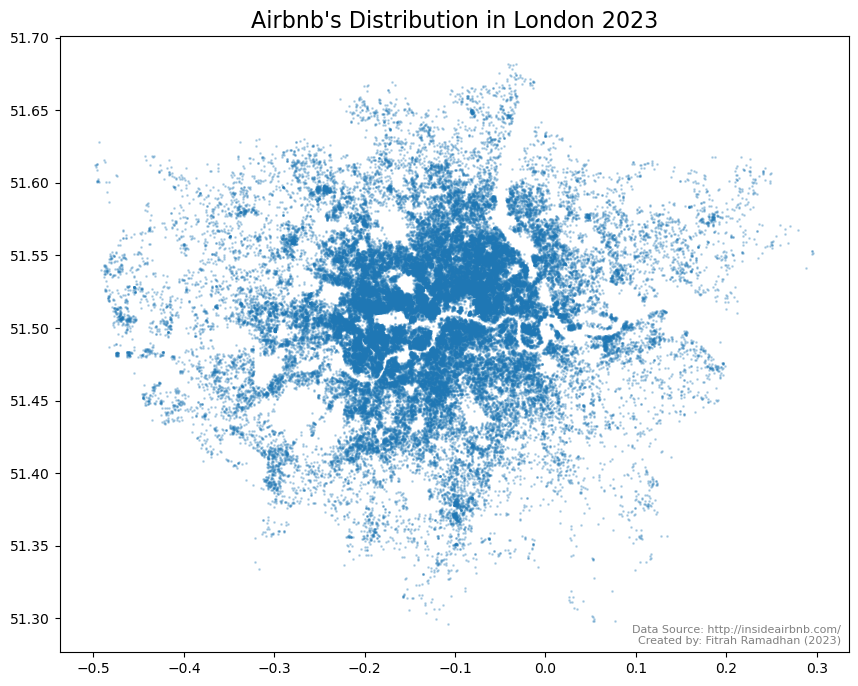

In [241]:
#Convert Airbnb dataframe into geodataframe
g_listings = gpd.GeoDataFrame(listings,
                              geometry=gpd.points_from_xy(listings.longitude, listings.latitude, crs='epsg:4326'))

#Plotting the data
plt.figure(figsize=(13, 8))
ax = plt.gca()  # Get the current Axes instance

## Set the background color to white
ax.set_facecolor('White')

## plot the airbnb distribution map
g_listings.plot(alpha=0.25, markersize=1, figsize=(13,8), ax=ax)

## Add a title to the map
plt.title("Airbnb's Distribution in London 2023", fontsize=16)

## Add source and creator information
source_text = "Data Source: http://insideairbnb.com/\nCreated by: Fitrah Ramadhan (2023)"
plt.text(0.99, 0.01, source_text, transform=ax.transAxes,
         fontsize=8, color='gray', ha='right', va='bottom')

## Save the map as an image file (e.g., PNG)
plt.savefig('airbnb_distribution_map.png', bbox_inches='tight', pad_inches=0.1)

plt.show()

### 6. Create Hexagonal Cover from London Boundary Map

<Axes: >

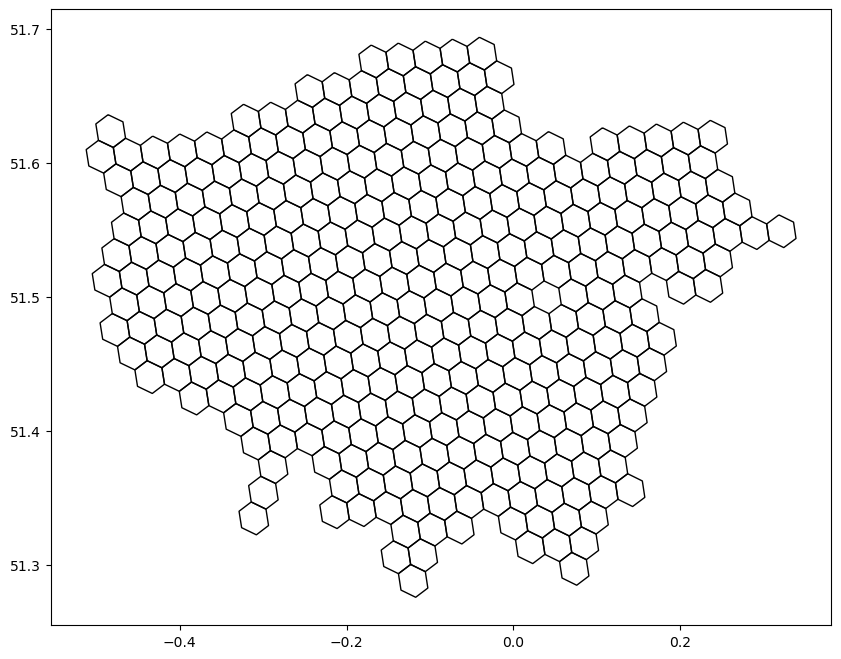

In [243]:
#Determine the resolution of hexagonal grid
resolution = 7

#Transform the Borough Boundaries to Become Grid
neighborhoods_h3 = neighborhoods.h3.polyfill(resolution, explode=True)
neighborhoods_h3 = neighborhoods_h3.set_index('h3_polyfill').h3.h3_to_geo_boundary()

#Plot the grid
neighborhoods_h3.plot(facecolor="none", edgecolor="black", figsize=(12,8))

### 7. Calculate Number of Airbnb for Each Grid

In [244]:
#Join the airbnb's location into grids
joined_data = gpd.sjoin(g_listings, neighborhoods_h3, how="right", op="within")

#Calculate the number of airbnb by each grid
airbnb_counts = joined_data.groupby('h3_polyfill')['geometry'].count().reset_index()
airbnb_counts = airbnb_counts.rename({'geometry': 'airbnb_counts'}, axis=1)

#Merge Grid layer with the count of airbnb
neighborhoods_h3 = neighborhoods_h3.reset_index()
neighborhoods_h3 = neighborhoods_h3.merge(airbnb_counts, on='h3_polyfill', how='left')
neighborhoods_h3.airbnb_counts

0       30
1       59
2      128
3        2
4      279
      ... 
337     40
338     93
339      8
340    137
341     50
Name: airbnb_counts, Length: 342, dtype: int64

### 8. Visualize Density of Airbnb with Hexagonal Map

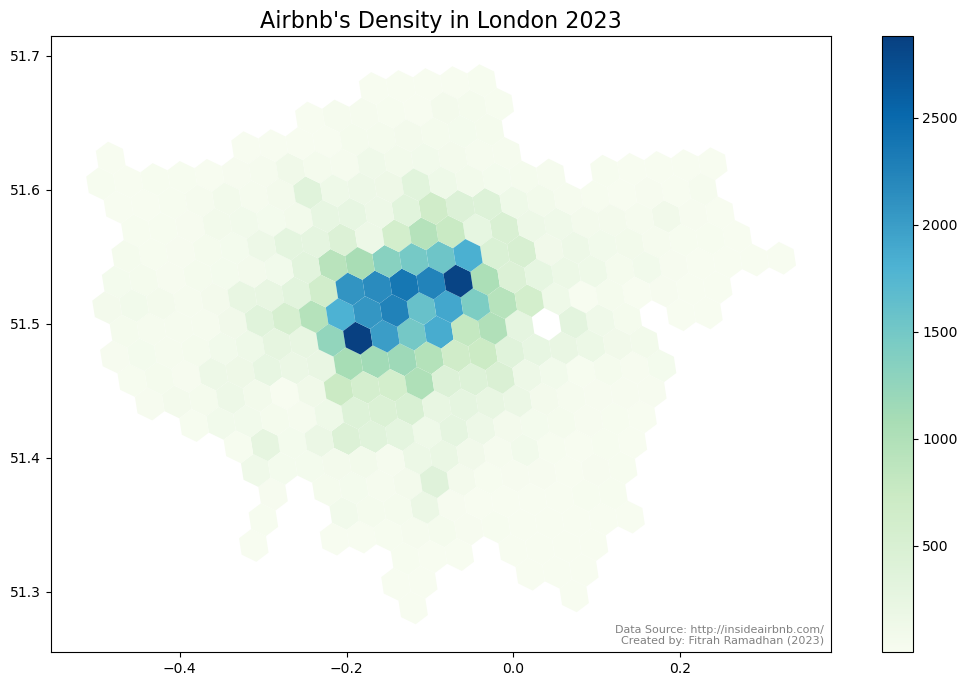

In [246]:
#Plot the density map

##Determine the figure size
plt.figure(figsize=(13, 8))
ax = plt.gca()  # Get the current Axes instance

# Set the background color to cream
ax.set_facecolor('White')

# Plot the density map
neighborhoods_h3.plot(column='airbnb_counts',
                      legend=True,
                      cmap='GnBu', #see the color allowed by matplotlib
                      edgecolor="None",
                      alpha=1,
                      ax=ax)

# Add a title to the map
plt.title("Airbnb's Density in London 2023", fontsize=16)

# Add source and creator information
source_text = "Data Source: http://insideairbnb.com/\nCreated by: Fitrah Ramadhan (2023)"
plt.text(0.99, 0.01, source_text, transform=ax.transAxes,
         fontsize=8, color='gray', ha='right', va='bottom')

# Save the map as an image file (e.g., PNG)
plt.savefig('airbnb_density_map.png', bbox_inches='tight', pad_inches=0.1)

plt.show()